In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [10]:
data = pd.read_csv("/content/top_expensive_leagues.csv")
data.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963,52.83


In [3]:
#describe the data
data.describe()

,Revenue (USD),Average Player Salary (USD),Total Teams,Founded Year,Viewership
count,7.000000e+02,7.000000e+02,700.000000,700.000000,700.000000
mean,4.280496e+09,7.900443e+06,21.184286,1953.061429,255.944400
std,2.162867e+09,4.100048e+06,6.676591,40.956733,140.300158
min,5.054000e+08,1.010000e+06,10.000000,1880.000000,2.280000
25%,2.522775e+09,4.180000e+06,15.000000,1917.750000,135.077500
50%,4.306905e+09,7.835000e+06,21.000000,1953.500000,250.860000
75%,6.112678e+09,1.148500e+07,27.000000,1989.250000,376.512500
max,7.997000e+09,1.496000e+07,32.000000,2023.000000,499.950000


In [4]:
#info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   League ID                    700 non-null    object 
 1   League Name                  700 non-null    object 
 2   Country                      700 non-null    object 
 3   Sport                        700 non-null    object 
 4   Revenue (USD)                700 non-null    float64
 5   Average Player Salary (USD)  700 non-null    float64
 6   Top Team                     700 non-null    object 
 7   Total Teams                  700 non-null    int64  
 8   Founded Year                 700 non-null    int64  
 9   Viewership                   700 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
#columns in data
data.columns

Index(['League ID', 'League Name', 'Country', 'Sport', 'Revenue (USD)',
       'Average Player Salary (USD)', 'Top Team', 'Total Teams',
       'Founded Year', 'Viewership'],
      dtype='object')

In [6]:
#finding null values
data.isnull().sum()

,0
League ID,0
League Name,0
Country,0
Sport,0
Revenue (USD),0
Average Player Salary (USD),0
Top Team,0
Total Teams,0
Founded Year,0
Viewership,0


#1) Which league generates the highest revenue, and how does it compare with the average revenue of all leagues?



In [22]:
#aggregate data with revenue and all leagues
df = data.groupby("League Name")["Revenue (USD)"].mean().reset_index()
df

,League Name,Revenue (USD)
0,Bundesliga,4.712076e+09
1,IPL,4.146412e+09
2,La Liga,4.316041e+09
3,Ligue 1,4.368883e+09
4,NBA,4.087845e+09
5,NFL,3.888832e+09
6,Premier League,4.459337e+09
7,Serie A,4.219910e+09


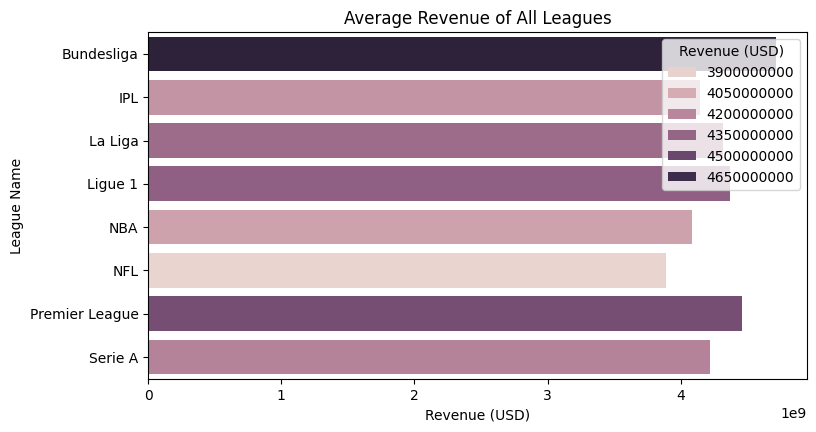

In [28]:
plt.figure(figsize = (8.5,4.5))
sn.barplot(df,y = "League Name",x = "Revenue (USD)",hue = "Revenue (USD)")
plt.title("Average Revenue of All Leagues")
plt.show()

#2) What is the correlation between average player salary and revenue across different leagues?


In [31]:
df = data[["Average Player Salary (USD)","Revenue (USD)"]].corr()
df

,Average Player Salary (USD),Revenue (USD)
Average Player Salary (USD),1.000000,-0.017689
Revenue (USD),-0.017689,1.000000


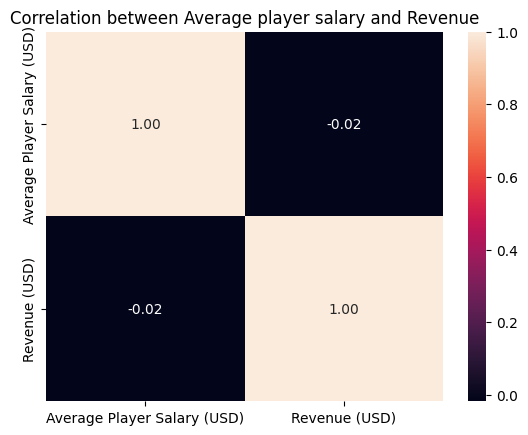

In [38]:
sn.heatmap(df,annot = True, fmt = ".2f")
plt.title("Correlation between Average player salary and Revenue")
plt.show()

#3) Which country has the highest number of leagues, and what is the distribution of sports across those leagues?


In [53]:
#Country with the Highest Number of Leagues and distribution of sport across all leagues
df = data.groupby(['Country','Sport'])['League Name'].count().reset_index(name = "Number of Leagues")
df

,Country,Sport,Number of Leagues
0,England,American Football,32
1,England,Basketball,21
2,England,Cricket,21
3,England,Football,28
4,France,American Football,20
5,France,Basketball,22
6,France,Cricket,17
7,France,Football,33
8,Germany,American Football,22
9,Germany,Basketball,24


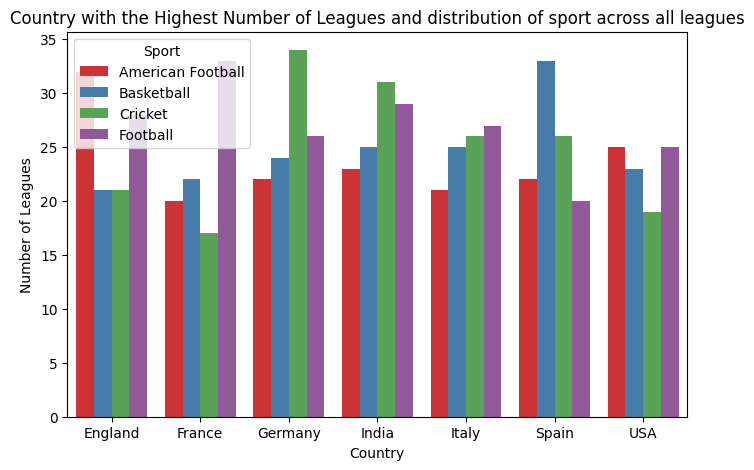

In [70]:
plt.figure(figsize = (8,5))
sn.barplot(df,x = "Country", hue = "Sport", y = "Number of Leagues",palette='Set1')
#plt.gca().invert_xaxis()
plt.title("Country with the Highest Number of Leagues and distribution of sport across all leagues")
plt.show()

#4) How has the founding year of leagues influenced their viewership and revenue in modern times?


In [79]:
df = data[["Founded Year","Viewership","Revenue (USD)"]]
df

,Founded Year,Viewership,Revenue (USD)
0,1886,485.90,5.275330e+09
1,1977,135.01,7.088640e+09
2,1979,157.49,7.930520e+09
3,1999,245.71,4.972890e+09
4,1963,52.83,6.265740e+09
...,...,...,...
695,1914,159.88,2.280400e+09
696,2009,194.31,6.945200e+08
697,2004,79.36,5.251210e+09
698,1897,238.50,5.898850e+09


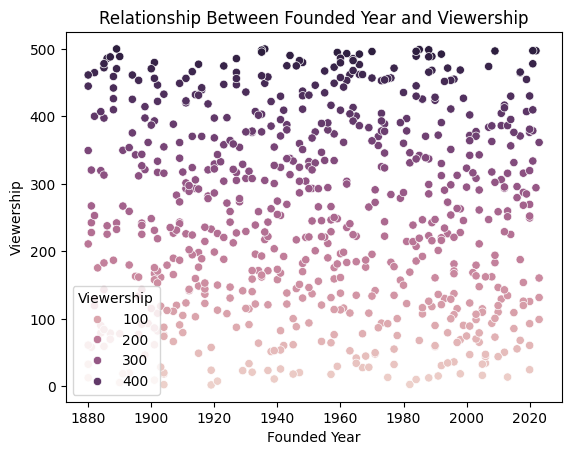

In [91]:
#Relationship Between Founded Year and Viewership
sn.scatterplot(df,x = "Founded Year", y = "Viewership", hue = "Viewership")
plt.title("Relationship Between Founded Year and Viewership")
plt.show()

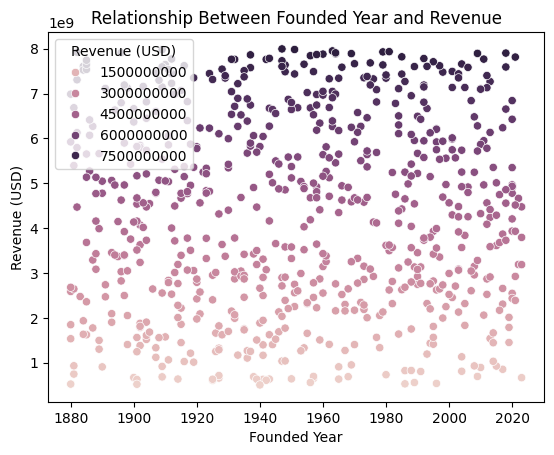

In [85]:
#Relationship Between Founded Year and Revenue
sn.scatterplot(df,x = "Founded Year", y = "Revenue (USD)",hue = "Revenue (USD)")
plt.title("Relationship Between Founded Year and Revenue")
plt.show()

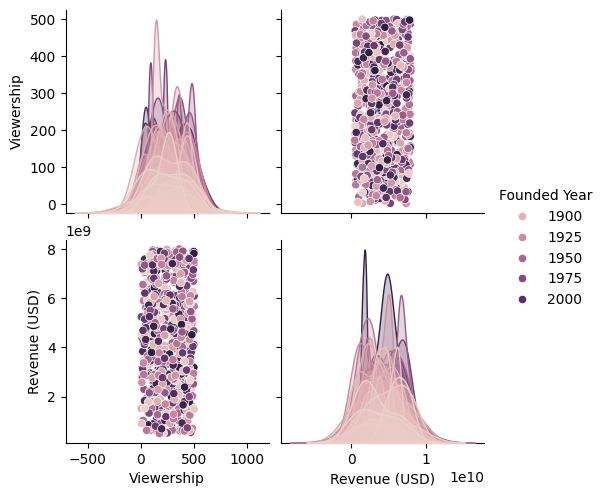

In [94]:
#pairplot for Founded Year, Viewership and Revenue (USD)
sn.pairplot(df[["Founded Year","Viewership","Revenue (USD)"]],hue = "Founded Year")
plt.show()

#5) What is the average viewership of leagues grouped by sport type, and which sport has the highest average viewership?

In [96]:
#Viewership,Sport
df = data[["Sport","Viewership"]]
df

,Sport,Viewership
0,Football,485.90
1,American Football,135.01
2,American Football,157.49
3,American Football,245.71
4,Basketball,52.83
...,...,...
695,Football,159.88
696,Cricket,194.31
697,Football,79.36
698,American Football,238.50


In [114]:
#average viewership of leagues grouped by sport type and which sport has the highest average viewership
df1 = df.groupby("Sport")["Viewership"].mean().reset_index(name = "Average Viewership")
sorted = df1.sort_values("Average Viewership",ascending = False)
sorted

,Sport,Average Viewership
3,Football,281.278670
2,Cricket,256.344368
1,Basketball,242.329769
0,American Football,240.931636


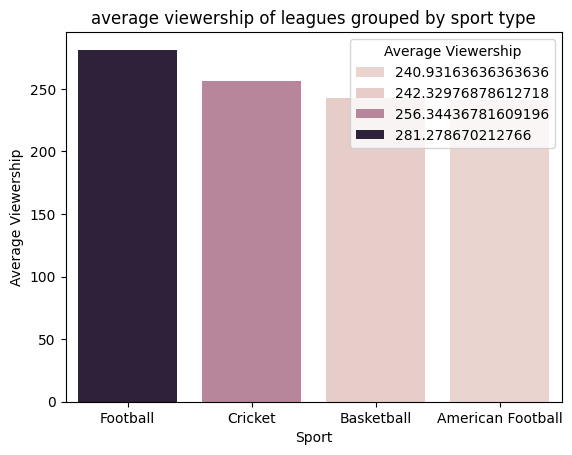

In [120]:
sn.barplot(sorted, x = "Sport", y = "Average Viewership",hue= "Average Viewership")
plt.title("average viewership of leagues grouped by sport type")
plt.show()